In [1]:
#take a look at the kind of GPU we have
!nvidia-smis

/bin/bash: nvidia-smis: command not found


In [2]:
pip install natsort

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
from PIL import Image
from natsort import natsorted

def convert_one_channel(img):
    # Một số hình ảnh có 3 kênh, mặc dù chúng là ảnh grayscale
    if len(img.shape) > 2:
        img = img[:, :, 0]
        return img
    else:
        return img

def pre_images(resize_shape, path):
    # Lấy danh sách các tệp trong thư mục và sắp xếp theo thứ tự tự nhiên
    dirs = natsorted(os.listdir(path))
    
    # Khởi tạo mảng để lưu kích thước gốc của các hình ảnh
    sizes = np.zeros([len(dirs), 2])
    
    # Mở và xử lý hình ảnh đầu tiên
    images = img = Image.open(os.path.join(path, dirs[0]))
    sizes[0, :] = images.size
    images = images.resize(resize_shape, Image.ANTIALIAS)
    images = convert_one_channel(np.asarray(images))
    
    # Xử lý các hình ảnh còn lại
    for i in range(1, len(dirs)):
        img = Image.open(os.path.join(path, dirs[i]))
        sizes[i, :] = img.size
        img = img.resize(resize_shape, Image.ANTIALIAS)
        img = convert_one_channel(np.asarray(img))
        images = np.concatenate((images, img))
    
    # Định hình lại mảng images để phù hợp với định dạng yêu cầu
    images = np.reshape(images, (len(dirs), resize_shape[0], resize_shape[1], 1))
    
    return images, sizes


In [4]:
# Đường dẫn tới thư mục dữ liệu trên Kaggle
path = '/kaggle/input/dentalpanoramicxrays/Images'

# Gọi hàm pre_images để chuẩn bị dữ liệu hình ảnh
# Thay đổi kích thước hình ảnh thành 512x512
X, X_sizes = pre_images((512, 512), path)

# In ra kích thước của tập dữ liệu đã chuẩn bị
print(f"Số lượng hình ảnh đã chuẩn bị: {len(X)}")
print(f"Kích thước ban đầu của các hình ảnh: {X_sizes}")


/tmp/ipykernel_23/2701521833.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  images = images.resize(resize_shape, Image.ANTIALIAS)
/tmp/ipykernel_23/2701521833.py:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(resize_shape, Image.ANTIALIAS)


Số lượng hình ảnh đã chuẩn bị: 116
Kích thước ban đầu của các hình ảnh: [[3100. 1300.]
 [3090. 1330.]
 [2900. 1300.]
 [2850. 1300.]
 [3050. 1200.]
 [2850. 1050.]
 [2950. 1360.]
 [3080. 1300.]
 [2800. 1270.]
 [2914. 1220.]
 [2730. 1100.]
 [2870. 1300.]
 [2940. 1200.]
 [2920. 1200.]
 [3000. 1270.]
 [2900. 1100.]
 [2800. 1170.]
 [2980. 1270.]
 [3050. 1250.]
 [2860. 1270.]
 [3000. 1230.]
 [3040. 1200.]
 [2900. 1245.]
 [2900. 1250.]
 [2850. 1150.]
 [2900. 1100.]
 [2970. 1170.]
 [2700. 1350.]
 [2850. 1150.]
 [3000. 1100.]
 [2980. 1050.]
 [3090. 1330.]
 [3120. 1270.]
 [3000. 1150.]
 [2800. 1250.]
 [2950. 1150.]
 [2950. 1150.]
 [2980. 1250.]
 [3050. 1050.]
 [2900. 1150.]
 [3050. 1200.]
 [3000. 1250.]
 [3000. 1150.]
 [3000. 1200.]
 [3000. 1200.]
 [2760. 1100.]
 [2800. 1380.]
 [2850. 1354.]
 [3082. 1340.]
 [3080. 1150.]
 [2800. 1250.]
 [3130. 1200.]
 [2780. 1300.]
 [2800. 1300.]
 [2970. 1350.]
 [2900. 1150.]
 [2750. 1300.]
 [2900. 1210.]
 [3046. 1260.]
 [3020. 1260.]
 [2950. 1250.]
 [3094. 1250.

In [5]:
import os
import numpy as np
from PIL import Image
from natsort import natsorted

def convert_one_channel(img):
    # Một số hình ảnh có 3 kênh, mặc dù chúng là ảnh grayscale
    if len(img.shape) > 2:
        img = img[:, :, 0]
    return img

def pre_masks(resize_shape=(512, 512), path='/kaggle/input/orig-masks'):
    dirs = natsorted(os.listdir(path))
    sizes = np.zeros([len(dirs), 2])
    
    # Mở và xử lý hình ảnh đầu tiên
    images = img = Image.open(os.path.join(path, dirs[0]))
    sizes[0, :] = images.size
    images = images.resize(resize_shape, Image.ANTIALIAS)
    images = convert_one_channel(np.asarray(images))
    
    # Xử lý các hình ảnh còn lại
    for i in range(1, len(dirs)):
        img = Image.open(os.path.join(path, dirs[i]))
        sizes[i, :] = img.size
        img = img.resize(resize_shape, Image.ANTIALIAS)
        img = convert_one_channel(np.asarray(img))
        images = np.concatenate((images, img))
    
    # Định hình lại mảng images để phù hợp với định dạng yêu cầu
    images = np.reshape(images, (len(dirs), resize_shape[0], resize_shape[1], 1))
    
    return images, sizes

def pre_splitted_masks(path='/kaggle/input/splitted-masks'):
    dirs = natsorted(os.listdir(path))
    
    # Mở và xử lý hình ảnh đầu tiên
    masks = img = Image.open(os.path.join(path, dirs[0]))
    masks = convert_one_channel(np.asarray(masks))
    
    # Xử lý các hình ảnh còn lại
    for i in range(1, len(dirs)):
        img = Image.open(os.path.join(path, dirs[i]))
        img = convert_one_channel(np.asarray(img))
        masks = np.concatenate((masks, img))
    
    # Định hình lại mảng masks để phù hợp với định dạng yêu cầu
    masks = np.reshape(masks, (len(dirs), 512, 512, 1))
    
    return masks



In [6]:


# Đường dẫn tới thư mục chứa các mặt nạ tùy chỉnh đã chia nhỏ
path = '/kaggle/input/splitted-masks'

# Gọi hàm pre_splitted_masks để chuẩn bị dữ liệu mặt nạ
Y = pre_splitted_masks(path=path)



In [7]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [8]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [9]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-sr3dwgjr
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-sr3dwgjr
  Resolved https://github.com/albu/albumentations to commit 512dc63e89551ab7b8dd53482c0205067d021176
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 794.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 945.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.4 MB/s eta 0:00:00
  Created wheel for albumentations: filename=albumentations-1.4.12-py3-none-any.whl size=171709 sha256=0a90c419cc147b44201ffe13f835b1996429779bcaa6dd5695e195b11230463b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nnqanhpn/wheels/3c/df/16/b3d0d64428c9f25b1ab03989a2e574546d3336647

In [10]:
!pip install opencv-python

In [11]:
import cv2
import albumentations as A
import numpy as np

# Augmention . Change what you want ! Care about Your GPU and CPU RAM

# If you get error : cannot import name '_registerMatType' from 'cv2.cv2' :
# !pip uninstall opencv-python-headless==4.5.5.62
# !pip install opencv-python-headless==4.5.2.52

aug = A.Compose([
    A.OneOf([A.RandomCrop(width=512, height=512),
             A.PadIfNeeded(min_height=512, min_width=512, p=0.5)], p=0.4),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.5),
    A.Compose([A.RandomScale(scale_limit=(-0.15, 0.15), p=1, interpolation=1),
               A.PadIfNeeded(512, 512, border_mode=cv2.BORDER_CONSTANT, value=0),
               A.Resize(512, 512, cv2.INTER_NEAREST)], p=0.5),
    A.ShiftScaleRotate(shift_limit=0.325, scale_limit=0.15, rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=0, p=1),
    A.Rotate(15, p=0.5),
    A.Blur(blur_limit=1, p=0.5),
    A.Downscale(scale_min=0.15, scale_max=0.25, always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(0.05, 0.1), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.25),
])

# Assume x_train and y_train are already defined as numpy arrays
x_train1 = np.copy(x_train)
y_train1 = np.copy(y_train)
count = 0
while count < 4:
    x_aug2 = np.copy(x_train1)
    y_aug2 = np.copy(y_train1)
    for i in range(len(x_train1)):
        augmented = aug(image=x_train1[i], mask=y_train1[i])
        x_aug2[i] = augmented['image']
        y_aug2[i] = augmented['mask']
    x_train = np.concatenate((x_train, x_aug2))
    y_train = np.concatenate((y_train, y_aug2))
    count += 1
#For Relase unneccasery memory
del x_aug2
del X
del Y
del y_aug2
del y_train1
del x_train1
del augmented

In [12]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

56


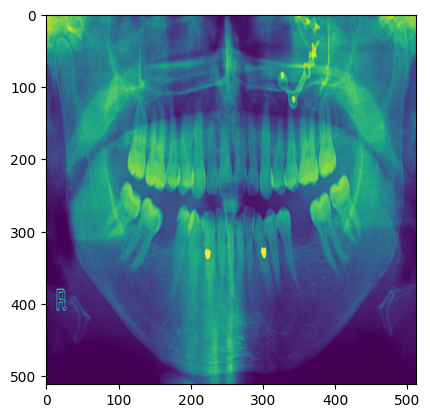

In [13]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

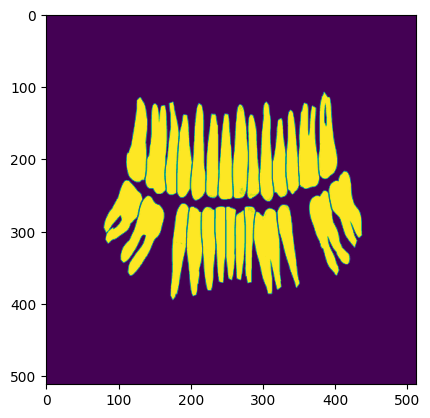

In [14]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [15]:
#### MODEL ###
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization,concatenate,Conv2DTranspose,Dropout
from tensorflow.keras.models import Model


def UNET (input_shape=(512,512,1),last_activation='sigmoid'):
    inputs=Input(shape=input_shape)
    
    conv1 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    d1=Dropout(0.1)(conv1)
    conv2 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d1)
    b=BatchNormalization()(conv2)
    
    pool1 = MaxPooling2D(pool_size=(2, 2))(b)
    conv3 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    d2=Dropout(0.2)(conv3)
    conv4 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d2)
    b1=BatchNormalization()(conv4)
    
    pool2 = MaxPooling2D(pool_size=(2, 2))(b1)
    conv5 = Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    d3=Dropout(0.3)(conv5)
    conv6 = Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d3)
    b2=BatchNormalization()(conv6)
    
    pool3 = MaxPooling2D(pool_size=(2, 2))(b2)
    conv7 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    d4=Dropout(0.4)(conv7)
    conv8 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d4)
    b3=BatchNormalization()(conv8)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(b3)
    conv9 = Conv2D(512,(3,3),activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    d5=Dropout(0.5)(conv9)
    conv10 = Conv2D(512,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d5)
    b4=BatchNormalization()(conv10)
    
    
    conv11 = Conv2DTranspose(512,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b4)
    x= concatenate([conv11,conv8])
    conv12 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
    d6=Dropout(0.4)(conv12)
    conv13 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d6)
    b5=BatchNormalization()(conv13)
    
    
    conv14 = Conv2DTranspose(256,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b5)
    x1=concatenate([conv14,conv6])
    conv15 = Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x1)
    d7=Dropout(0.3)(conv15)
    conv16 = Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d7)
    b6=BatchNormalization()(conv16)
    
    conv17 = Conv2DTranspose(128,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b6)
    x2=concatenate([conv17,conv4])
    conv18 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x2)
    d8=Dropout(0.2)(conv18)
    conv19 = Conv2D(64,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d8)
    b7=BatchNormalization()(conv19)
    
    conv20 = Conv2DTranspose(64,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b7)
    x3=concatenate([conv20,conv2])
    conv21 = Conv2D(32,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x3)
    d9=Dropout(0.1)(conv21)
    conv22 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d9)
    
    outputs = Conv2D(1,(1,1), activation = last_activation, padding = 'same', kernel_initializer = 'he_normal')(conv22)
    model2 = Model( inputs = inputs, outputs = outputs)
    
    return model2

2024-07-31 01:23:26.441323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 01:23:26.441447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 01:23:26.610289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512, 512,  │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │      9,248 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 512, 512,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256, 256,  │          0 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │     36,928 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │    147,584 │ dropout_2[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_2[

 Total params: 13,423,361 (51.21 MB)

 Trainable params: 13,420,481 (51.20 MB)

 Non-trainable params: 2,880 (11.25 KB)

In [17]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch
model.fit(x_train,y_train,batch_size=8,epochs=200,verbose=1)

Epoch 1/200


2024-07-31 01:24:45.945344: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[8,32,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,96,512,512]{3,2,1,0}, f32[32,96,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-31 01:24:46.196447: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.25122866s
Trying algorithm eng0{} for conv (f32[8,32,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,96,512,512]{3,2,1,0}, f32[32,96,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-0

65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.7451 - loss: 0.4555

2024-07-31 01:29:30.103463: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,192,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,192,256,256]{3,2,1,0}, f32[5,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-31 01:29:30.740021: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.636678482s
Trying algorithm eng0{} for conv (f32[64,192,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[5,192,256,256]{3,2,1,0}, f32[5,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-31 01:29:33.217434: E external/

66/66 ━━━━━━━━━━━━━━━━━━━━ 376s 3s/step - accuracy: 0.7459 - loss: 0.4541
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 58s 877ms/step - accuracy: 0.8067 - loss: 0.3208
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 867ms/step - accuracy: 0.8620 - loss: 0.2090
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 867ms/step - accuracy: 0.8748 - loss: 0.1798
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 866ms/step - accuracy: 0.8771 - loss: 0.1754
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 866ms/step - accuracy: 0.8790 - loss: 0.1657
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 866ms/step - accuracy: 0.8828 - loss: 0.1628
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 866ms/step - accuracy: 0.8876 - loss: 0.1474
Epoch 9/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 866ms/step - accuracy: 0.8884 - loss: 0.1424
Epoch 10/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 82s 873ms/step - accuracy: 0.8875 - loss: 0.1442
Epoch 11/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 864ms/step - accuracy: 0.8899 - loss: 0.1375
Epoch 12/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 

In [18]:
predict_img=model.predict(x_test)
model.save('dental_segmentation_model_huy_1.keras')


predict=predict_img[1,:,:,0]

2024-07-31 04:43:41.631476: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[11,32,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[11,96,512,512]{3,2,1,0}, f32[32,96,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-31 04:43:42.521130: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.889748787s
Trying algorithm eng0{} for conv (f32[11,32,512,512]{3,2,1,0}, u8[0]{0}) custom-call(f32[11,96,512,512]{3,2,1,0}, f32[32,96,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 68s 68s/step


In [19]:
#Example Test
from sklearn.metrics import f1_score
import numpy as np
predict_img1=(predict_img>0.25)*1
y_test1=(y_test>0.25)*1

f1_score(predict_img1.flatten(), y_test1.flatten(), average='micro')

0.9572504216974432

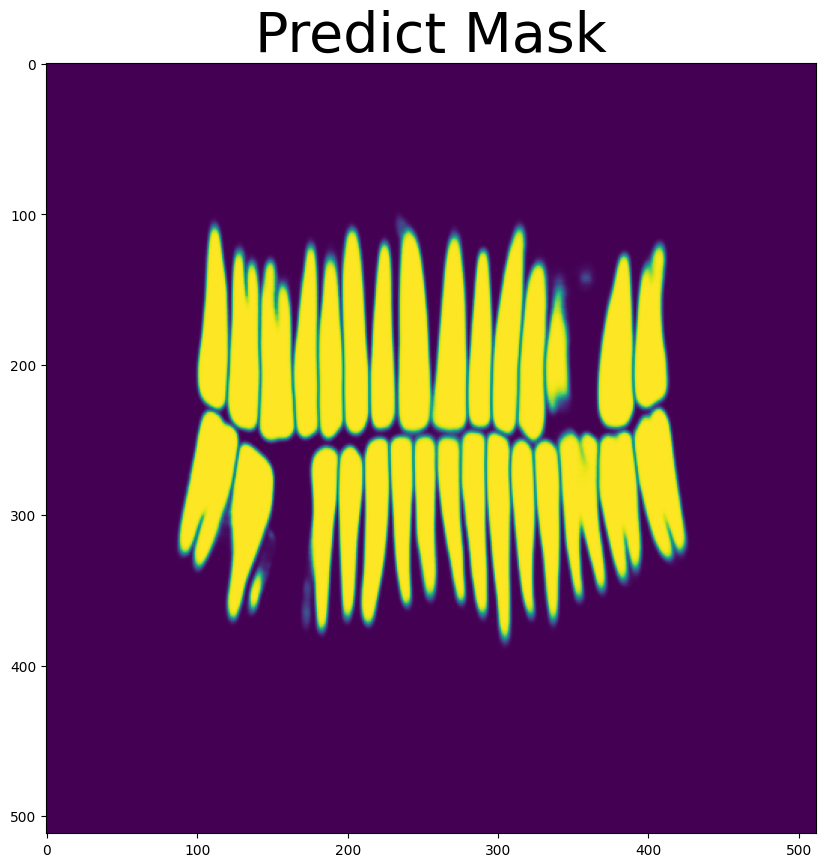

In [20]:
plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
# plt.imsave("/kaggle/input/dentalpanoramicxrays/predict.png",predict)

In [21]:

# import cv2
# from CCA_Analysis import *


# ##Plotting - RESULT Example
# img=cv2.imread("/kaggle/input/dentalpanoramicxrays/Images/107.png")#original img 107.png

# predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

# mask=np.uint8(predict1*255)#
# _, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
# cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
# img = cv2.UMat.get(img)
# cv2_imshow(img)

In [22]:

# import cv2
# from CCA_Analysis import *


# ##Plotting - RESULT Example with CCA_Analysis
# img=cv2.imread("/kaggle/input/dentalpanoramicxrays/Images/107.png")#original img 107.png

# #load image (mask was saved by matplotlib.pyplot)
# predicted=cv2.imread("/kaggle/input/dentalpanoramicxrays/predict.png")

# predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

# cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
# cv2_imshow(cca_result)

In [23]:
# print(teeth_count,"Teeth Count")

In [24]:
# import tensorflow as tf
# tf.keras.models.save_model(model, '/content/drive/MyDrive/dental_xray_seg.h5')